In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.image as mpimg
import pydotplus
from io import StringIO
import graphviz
from sklearn.tree import export_graphviz
df = pd.read_csv('../datasets/scores_w_avgs.csv')
df = df.dropna()
df

,schedule_date,schedule_season,home_id,away_id,score_home,home_avg_yards,home_avg_TO,score_away,away_avg_yards,away_avg_TO,total_score,over_under_line,label
0,1/14/1968,1967,GNB,RAI,33,304.117647,2.529412,14,361.764706,2.352941,47,43.0,over
1,1/12/1969,1968,CLT,NYJ,7,332.529412,2.529412,16,365.470588,1.823529,23,40.0,under
2,1/11/1970,1969,KAN,MIN,23,315.470588,2.588235,7,293.705882,2.235294,30,39.0,under
3,1/17/1971,1970,CLT,DAL,16,301.470588,2.529412,13,306.823529,2.000000,29,36.0,under
4,1/16/1972,1971,DAL,MIA,24,342.000000,2.176471,3,311.176471,1.705882,27,34.0,under
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10391,1/17/2021,2020,KAN,CLE,22,417.117647,1.000000,17,370.882353,0.882353,39,56.0,under
10392,1/17/2021,2020,NOR,TAM,20,378.294118,1.294118,30,391.647059,0.882353,50,53.0,under
10393,1/24/2021,2020,GNB,TAM,26,386.294118,0.764706,31,392.352941,0.941176,57,53.0,over
10394,1/24/2021,2020,KAN,BUF,38,421.235294,1.058824,24,376.235294,1.176471,62,55.0,over


In [279]:
df['score_home'] = df['score_home'].astype('float64')
df['score_away'] = df['score_away'].astype('float64')
df['total_score'] = df['total_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10332 entries, 0 to 10395
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   schedule_date    10332 non-null  object 
 1   schedule_season  10332 non-null  int64  
 2   home_id          10332 non-null  object 
 3   away_id          10332 non-null  object 
 4   score_home       10332 non-null  float64
 5   home_avg_yards   10332 non-null  float64
 6   home_avg_TO      10332 non-null  float64
 7   score_away       10332 non-null  float64
 8   away_avg_yards   10332 non-null  float64
 9   away_avg_TO      10332 non-null  float64
 10  total_score      10332 non-null  float64
 11  over_under_line  10332 non-null  float64
 12  label            10332 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 1.1+ MB


In [280]:
features = pd.DataFrame(df, columns = ['home_avg_yards', 'home_avg_TO', 'away_avg_yards', 'away_avg_TO'])
labels = pd.DataFrame(df, columns=['label'])

In [281]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(features, np.ravel(labels), test_size=0.3, random_state=109)
print(X_train)

      home_avg_yards  home_avg_TO  away_avg_yards  away_avg_TO
315       347.588235     2.764706      364.647059     2.764706
2404      307.705882     2.294118      303.117647     3.058824
2959      287.000000     2.294118      332.117647     1.823529
8940      395.235294     1.588235      338.882353     2.176471
6173      418.294118     1.764706      359.764706     1.764706
...              ...          ...             ...          ...
2635      311.176471     2.352941      352.470588     1.823529
2447      382.352941     1.941176      309.352941     1.823529
141       278.882353     2.117647      280.058824     2.941176
7989      323.529412     0.764706      396.294118     1.352941
3317      266.529412     2.000000      295.823529     1.823529

[7232 rows x 4 columns]


In [282]:
from sklearn import tree, metrics

# We want to test out different C values to see what works best
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)

    
    # Train the model using the training sets
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
    
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn) 
f1 = (2*(recall * precision)) / (recall + precision)

In [283]:
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1: {f1}")

accuracy: 0.5229032258064517
precision: 0.5427350427350427
recall: 0.5491043854231007
f1: 0.5459011360147374


Index(['home_avg_yards', 'home_avg_TO', 'away_avg_yards', 'away_avg_TO'], dtype='object')


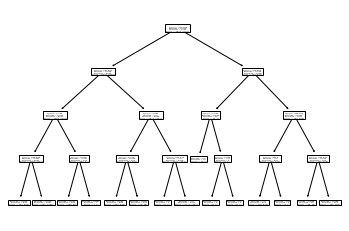

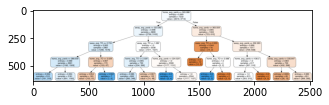

In [286]:
# plot tree
print(features.columns)
tree.plot_tree(clf)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features.columns, filled=True, rounded=True)
filename = "decision_tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)
#graph = graphviz.Source(dot_data)
#graph.render("iris")


In [285]:
fmt = "{0:.4f}"
for item in a:
    print(f'c: {fmt.format(item["c"])}, accuracy: {fmt.format(item["accuracy"])}, precision: {fmt.format(item["precision"])}, recall: {fmt.format(item["recall"])}, f1: {fmt.format(item["f1"])}')

c: 0.1000, accuracy: 0.5290, precision: 0.5371, recall: 0.7109, f1: 0.6119
c: 0.2000, accuracy: 0.5300, precision: 0.5380, recall: 0.7085, f1: 0.6116
c: 0.3000, accuracy: 0.5310, precision: 0.5380, recall: 0.7221, f1: 0.6166
c: 0.4000, accuracy: 0.5323, precision: 0.5387, recall: 0.7258, f1: 0.6184
c: 0.5000, accuracy: 0.5313, precision: 0.5380, recall: 0.7258, f1: 0.6179
c: 0.6000, accuracy: 0.5310, precision: 0.5382, recall: 0.7171, f1: 0.6149
c: 0.7000, accuracy: 0.5290, precision: 0.5370, recall: 0.7134, f1: 0.6127
c: 0.8000, accuracy: 0.5323, precision: 0.5393, recall: 0.7165, f1: 0.6154
c: 0.9000, accuracy: 0.5319, precision: 0.5388, recall: 0.7208, f1: 0.6166
c: 1.0000, accuracy: 0.5306, precision: 0.5381, recall: 0.7146, f1: 0.6140
